# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.254682e+01     1.544813e+01
 * time: 0.003084897994995117
     1     6.189281e+01     9.599231e+00
 * time: 0.009079933166503906
     2     5.391387e+01     1.151123e+01
 * time: 0.023277997970581055
     3     3.897669e+01     9.317131e+00
 * time: 0.04180788993835449
     4     2.828510e+01     8.874101e+00
 * time: 0.13204693794250488
     5     2.313740e+01     7.054045e+00
 * time: 0.14846301078796387
     6     9.813033e+00     2.007781e+00
 * time: 0.1646728515625
     7     6.913412e+00     2.711835e+00
 * time: 0.1779317855834961
     8     6.079523e+00     1.692115e+00
 * time: 0.1915268898010254
     9     5.920353e+00     1.710378e+00
 * time: 0.20287299156188965
    10     5.784272e+00     1.396347e+00
 * time: 0.21378588676452637
    11     5.703456e+00     8.458297e-01
 * time: 0.22830891609191895
    12     5.686018e+00     1.153363e+00
 * time: 0.24264192581176758
    13     5.684375e+00     9.994376e-01
 * time: 0.

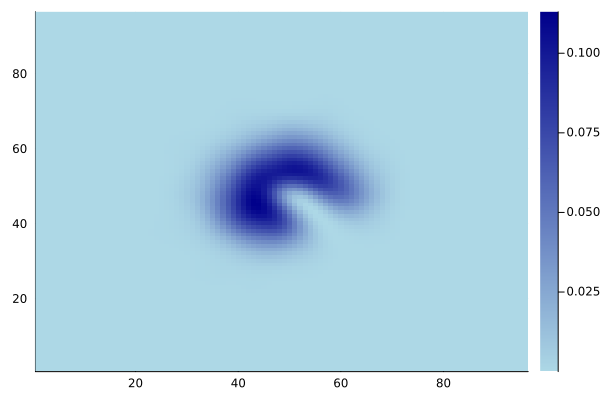

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)